In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This makes your plot look like latex. Great for writing papers!
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

If you're a geek like me and love xkcd, rerun these examples after doing `plt.xkcd()`

In [2]:
#plt.xkcd()

# Exercises

For the exam, please prepare 2 exercises from this list.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Q4: Climate

Download the data file of global surface air temperature averages from here:
https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt
This data comes from: https://data.giss.nasa.gov/gistemp/graphs/

(Don't ask, of course you can download data straight from python! The library is called `urllib`)

There are 3 columns here: the year, the temperature change, and a smoothed representation of the temperature change.  

  * Read in this data using `np.loadtxt()`.  
  * Plot as a line the smoothed representation of the temperature changes.  
  * Plot as points the temperature change (no smoothing).  Color the points blue if they are < 0 and color them red if they are >= 0
  
You might find the numpy `where()` function useful.

In [4]:
import urllib.request
import matplotlib.colors as mcolors

url = "https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt"
with urllib.request.urlopen(url) as f:
    data = np.loadtxt(f)

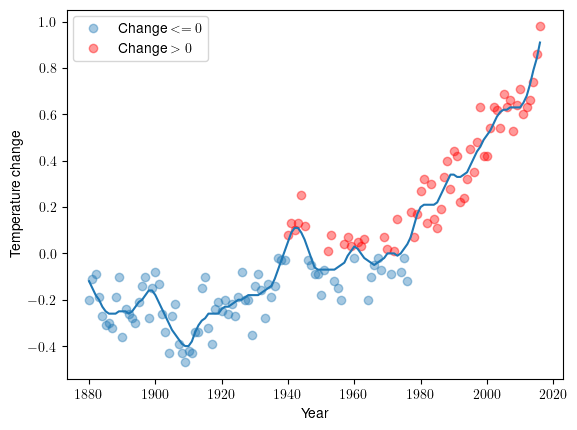

In [5]:
x = data[:,0]
y = data[:,1]
plt.plot(x, data[:,2])
plt.scatter(x[y<=0], y[y<=0], alpha=0.4, label="Change $<= 0$")
plt.scatter(x[y>0], y[y>0], alpha=0.4, color="red", label="Change $> 0$")


plt.xlabel("Year")
plt.ylabel("Temperature change")
plt.legend()
plt.show()

## Q6: frequent words plotting

In this exercise, we will read the file with the transcription of _Star Trek TOS, Shore Leave_ and calculate the amount of time each word was found. We will then plot the 25 most frequent words and label the plot.

#### Read the file and create the dictionaty {'word':count}

   * Open the `shore_leave.txt`
   * Create the dictionary of the form {'word':count}, where `count` shows the amount of times the word was found in the text. Remember to get rid of the punctuation ("." and ",") and to ensure that all words are lowercase

In [6]:
with open("../lectures/shore_leave.txt", "r") as file:
    data = file.read().lower()
    
    for s in ("\n", ".", ","):
        data = data.replace(s, " ")

In [7]:
list_data = data.split()
my_dict = {word: list_data.count(word) for word in set(list_data)}

sorted_dict = sorted(my_dict.items(), key=lambda x:-x[1])
first25 = {k[0]: my_dict[k[0]] for k in sorted_dict[:25]}

#### Plot 25 most frequent words

Plot a labelled bar chart of the most frequent 25 words with their frequencies.

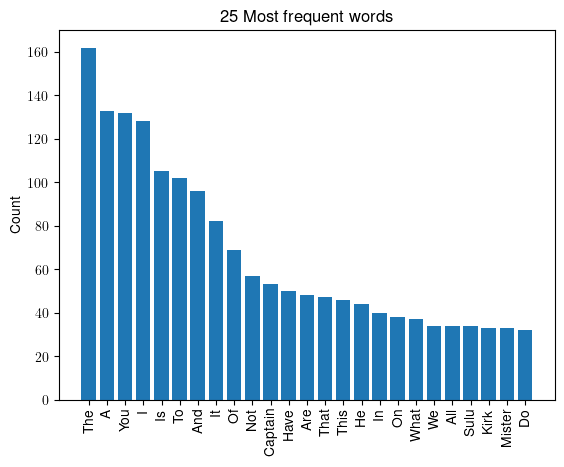

In [13]:
labels = [a.capitalize() for a in first25]
indexes = np.arange(len(labels))
plt.bar(indexes, list(first25.values()))
plt.xticks(indexes + 0.01, labels, rotation=90)

plt.title("25 Most frequent words")
plt.ylabel("Count")
            
plt.show()

## Q7: Mandelbrot set

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined such that $z_{k+1} = z_k^2 + c$
remains bounded, which is usually taken as $|z_{k+1}| <= 2$
where $c$ is a complex number and we start with $z_0 = 0$

We want to consider a range of $c$, as complex numbers $c = x + iy$,
where $-2 < x < 2$ and $-2 < y < 2$.

For each $c$, identify its position on a Cartesian grid as $(x,y)$ and 
assign a value $N$ that is the number of iterations, $k$, required for $|z_{k+1}|$ to become greater than $2$.

The plot of this function is called the Mandelbrot set.

Here's a simple implementation that just does a fixed number of iterations and then colors points in Z depending on whether they satisfy $|z| \le 2$.  

Your task is to extend this to record the number of iterations it takes for each point in the Z-plane to violate that constraint,
and then plot that data -- it will show more structure


/tmp/ipykernel_31124/1169565317.py:15: RuntimeWarning: overflow encountered in square
  z = z**2 + c
/tmp/ipykernel_31124/1169565317.py:15: RuntimeWarning: invalid value encountered in square
  z = z**2 + c


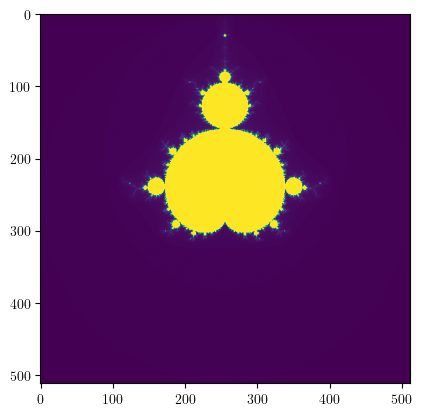

In [15]:
N = 256
iters = 256

x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

xv, yv = np.meshgrid(x, y, indexing="ij")

c = xv + 1j*y

z = np.zeros((N, N), dtype=np.complex128)

my_m = np.zeros((N, N),)
for i in range(iters):
    z = z**2 + c
    
    m = np.ones((N, N))
    m[np.abs(z) <= 2] = 0.0
    my_m = my_m + m

my_m = iters - my_m

fig, ax = plt.subplots()
ax.imshow(my_m)